In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [23]:
student = pd.read_csv(r"C:\Users\bbuser\Downloads\student_admission_dataset.csv")
student

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


In [24]:
# Clean column names (remove spaces)
student.columns = student.columns.str.strip()

In [25]:
print(student.head())

    GPA  SAT_Score  Extracurricular_Activities Admission_Status
0  3.46       1223                           8         Rejected
1  2.54        974                           8         Rejected
2  2.91        909                           9         Rejected
3  2.83       1369                           5         Accepted
4  3.60       1536                           7         Accepted


In [26]:
print(student.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB
None


In [27]:
print(student.columns)

Index(['GPA', 'SAT_Score', 'Extracurricular_Activities', 'Admission_Status'], dtype='object')


In [28]:
# label incoding for the admission_status column.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categories to numbers
student['Admission_Status'] = le.fit_transform(student['Admission_Status'])

In [29]:
#Identify Features & Label
label_column = 'Admission_Status'  

X = student[['GPA', 'SAT_Score']]  # features
y = student[label_column]        # labels

print(X.head())
print(y.value_counts())

    GPA  SAT_Score
0  3.46       1223
1  2.54        974
2  2.91        909
3  2.83       1369
4  3.60       1536
Admission_Status
2    88
1    81
0    81
Name: count, dtype: int64


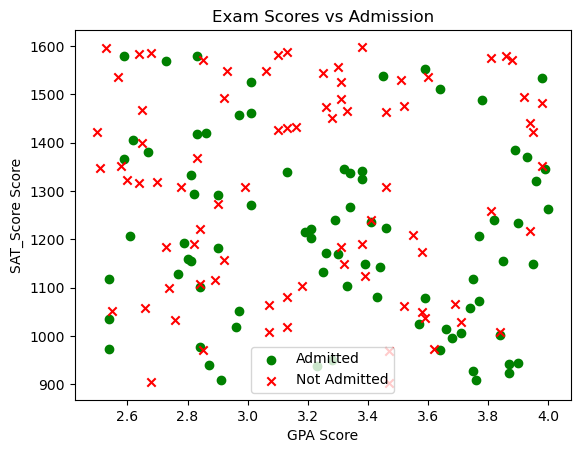

In [30]:
admitted = student[student[label_column] == 1]
not_admitted = student[student[label_column] == 0]

plt.scatter(admitted['GPA'], admitted['SAT_Score'], c='green', marker='o', label='Admitted')
plt.scatter(not_admitted['GPA'], not_admitted['SAT_Score'], c='red', marker='x', label='Not Admitted')

plt.xlabel("GPA Score")
plt.ylabel("SAT_Score Score")
plt.legend()
plt.title("Exam Scores vs Admission")
plt.show()

In [32]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
#Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


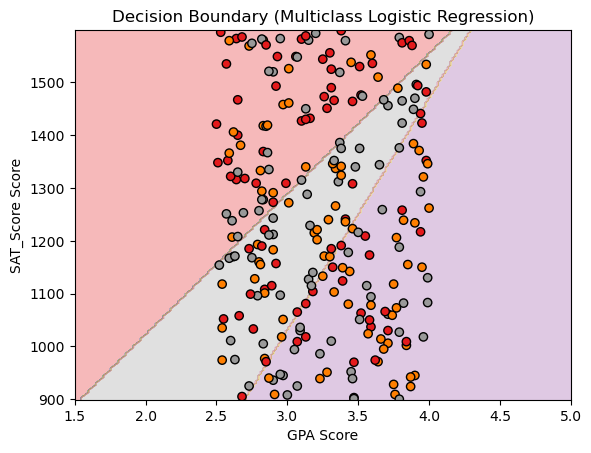

In [34]:
# Define plotting range
x_min, x_max = X['GPA'].min() - 1, X['GPA'].max() + 1
y_min, y_max = X['SAT_Score'].min() - 1, X['SAT_Score'].max() + 1

# Create a grid of points
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict class for each point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot background (decision regions)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

# Plot actual data points
plt.scatter(X['GPA'], X['SAT_Score'], c=y, edgecolors='k', cmap=plt.cm.Set1)

plt.xlabel("GPA Score")
plt.ylabel("SAT_Score Score")
plt.title("Decision Boundary (Multiclass Logistic Regression)")
plt.show()


Accuracy: 0.500


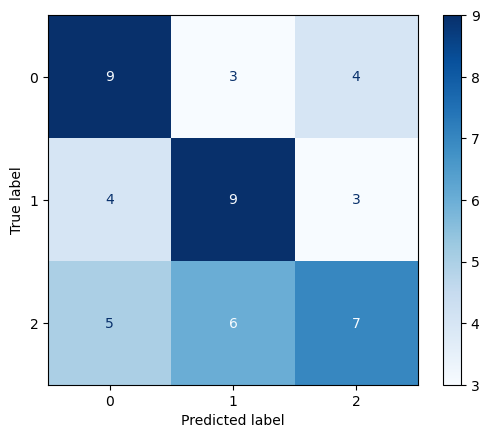

In [35]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.show()